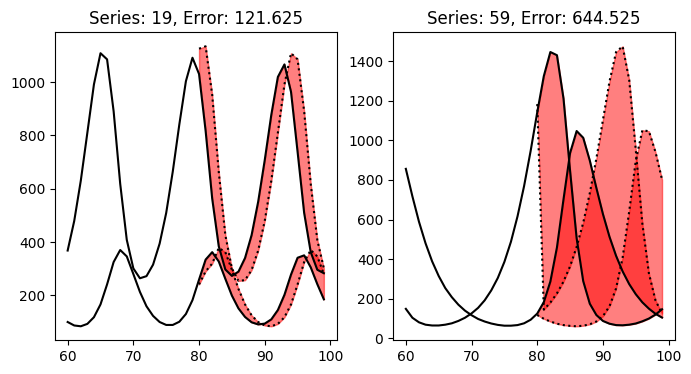

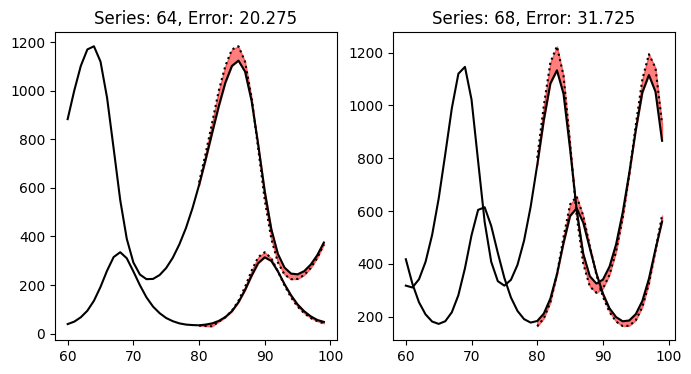

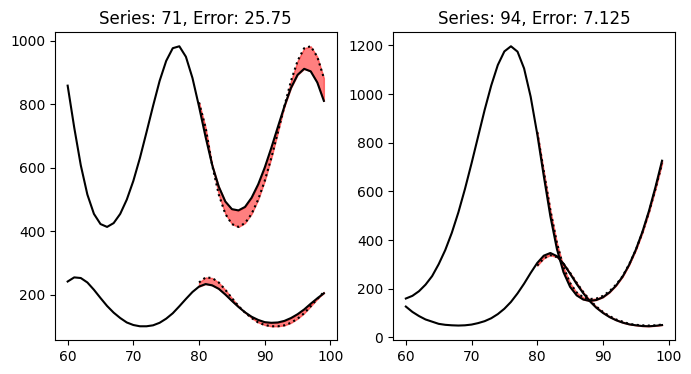

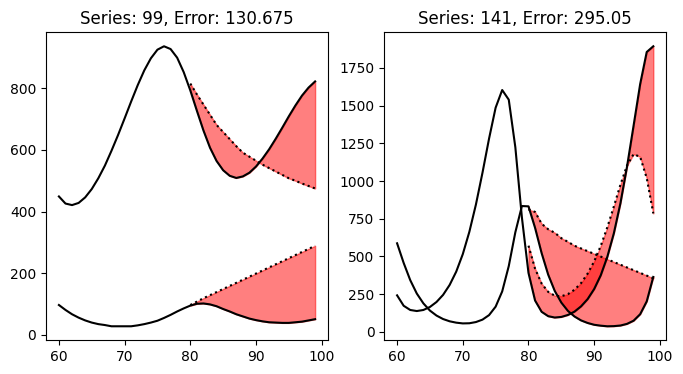

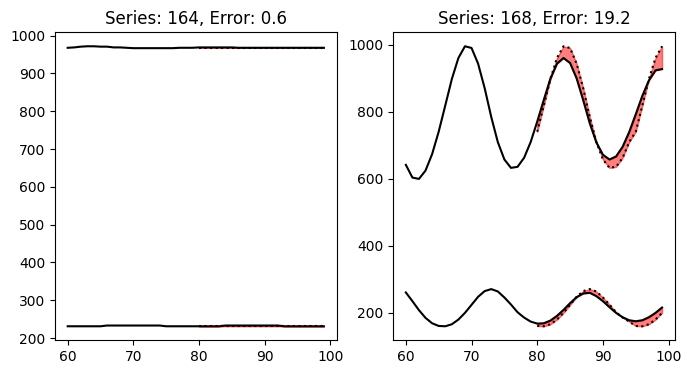

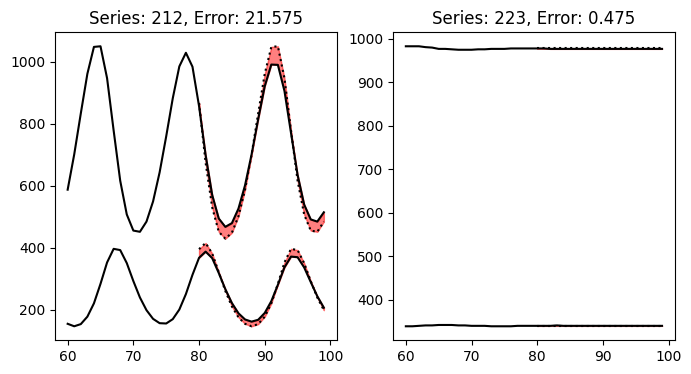

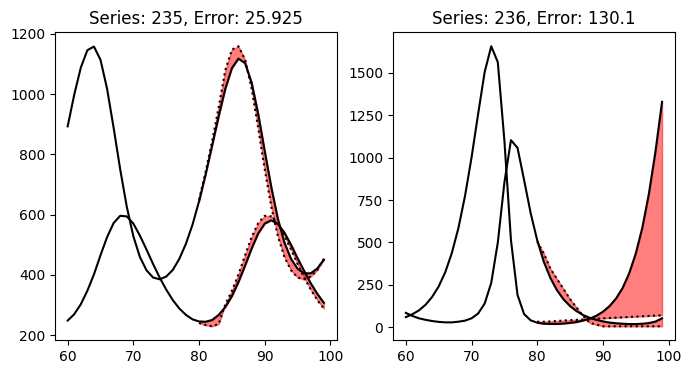

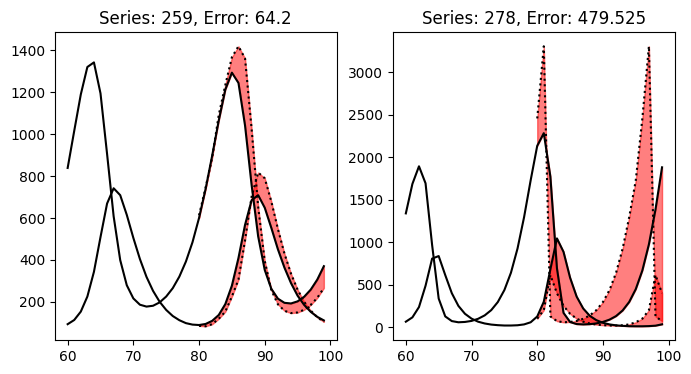

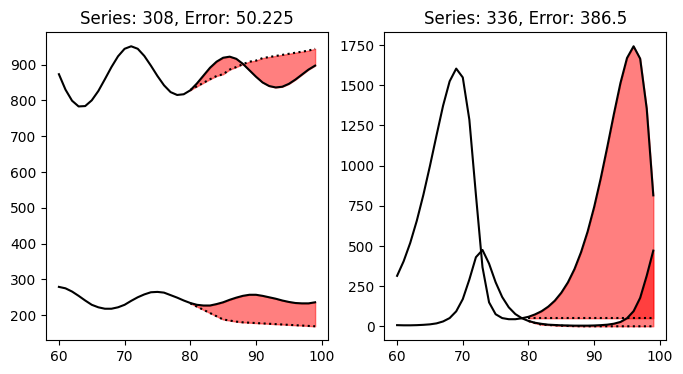

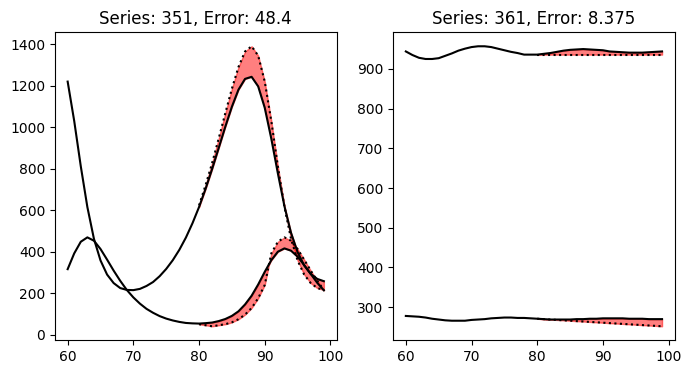

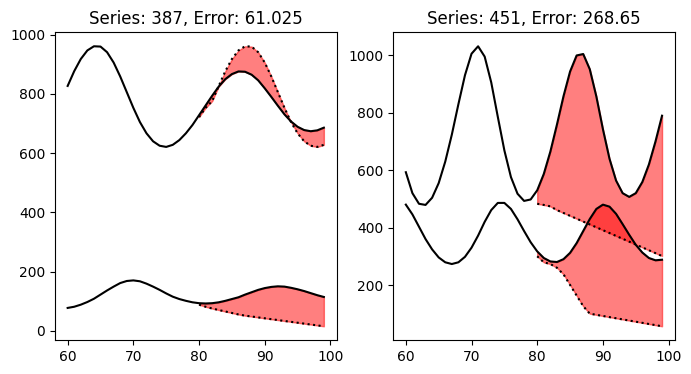

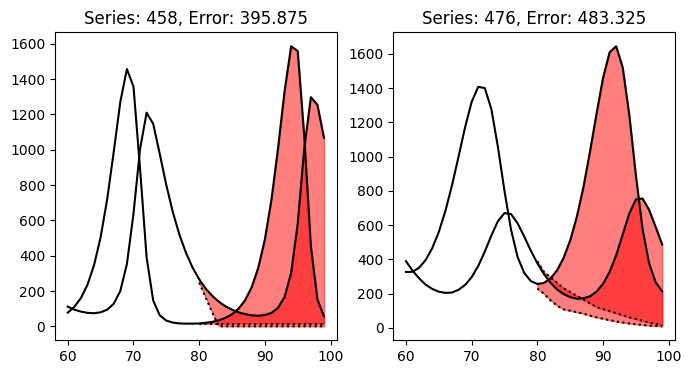

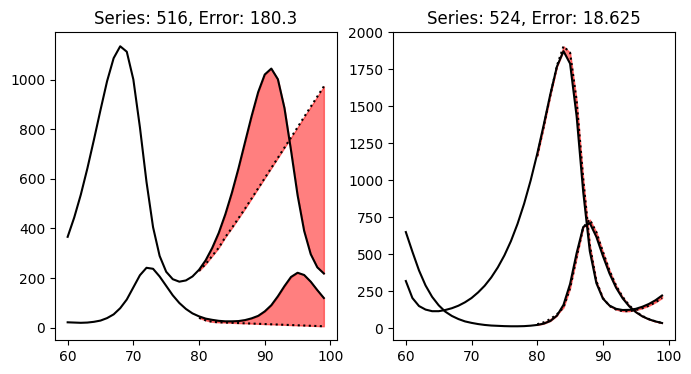

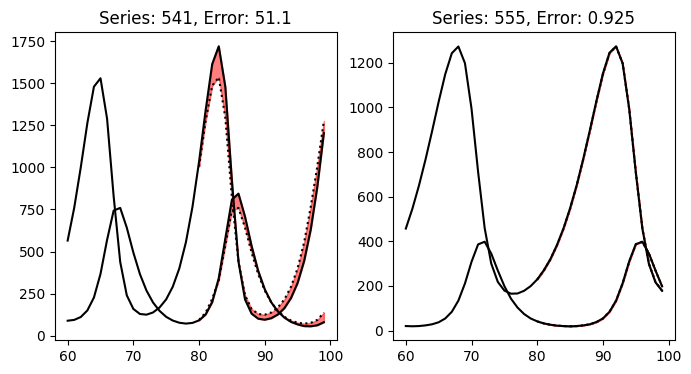

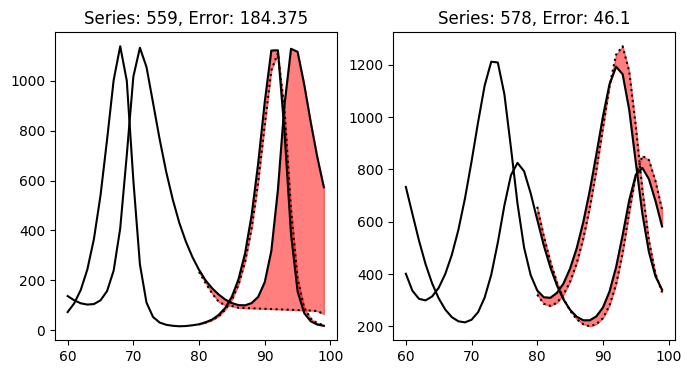

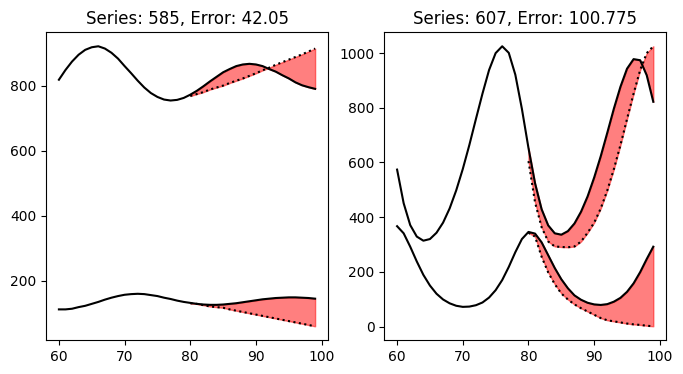

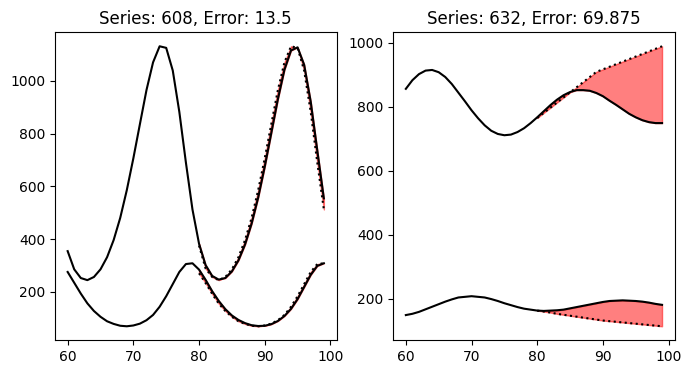

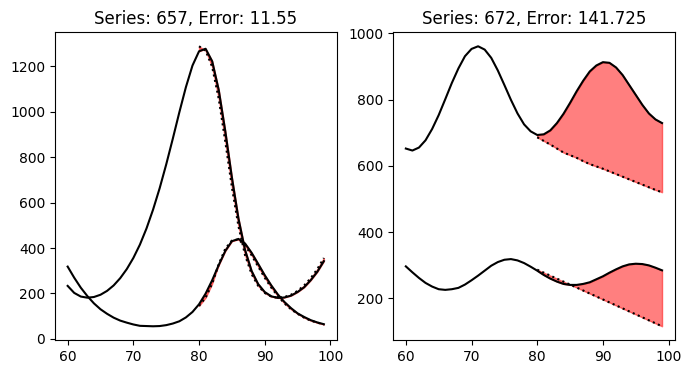

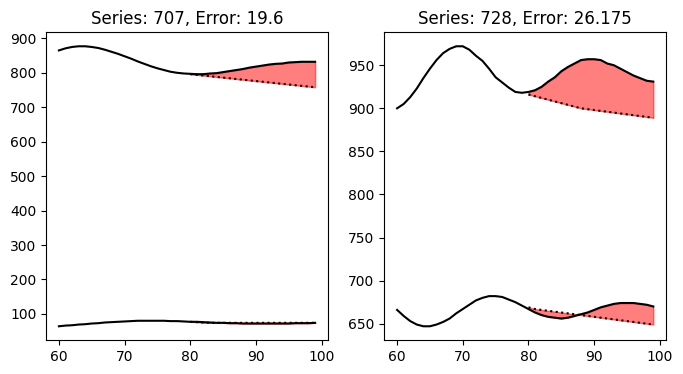

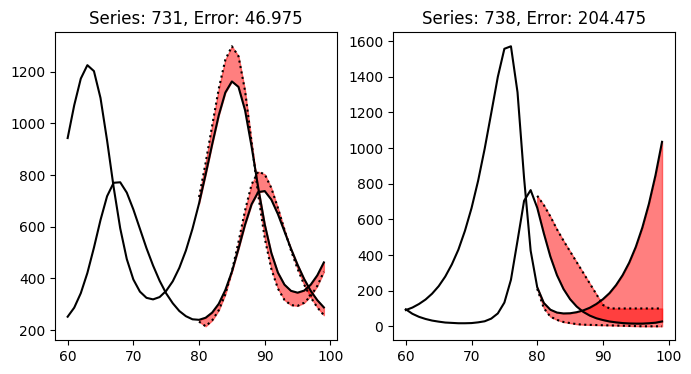

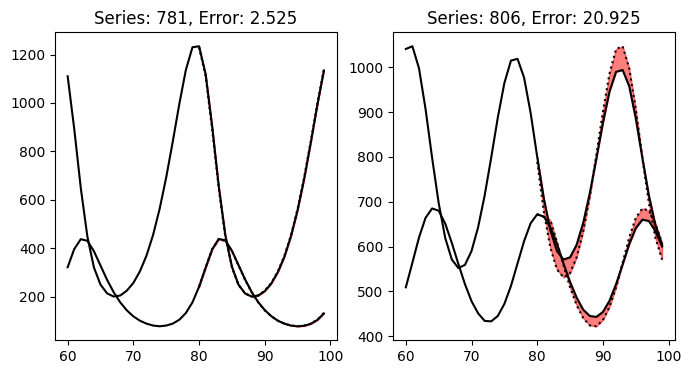

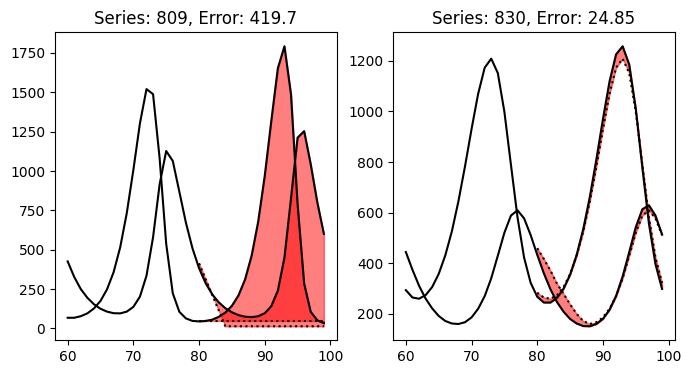

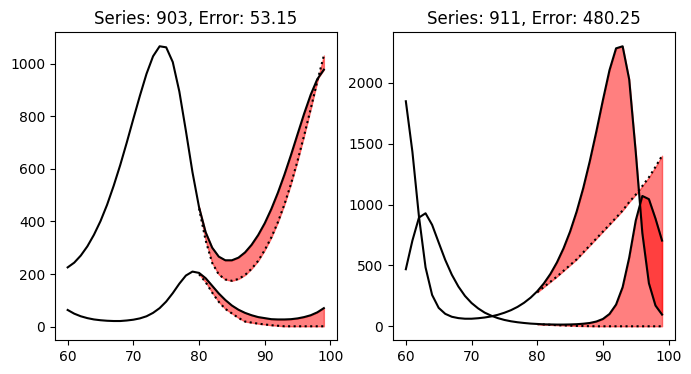

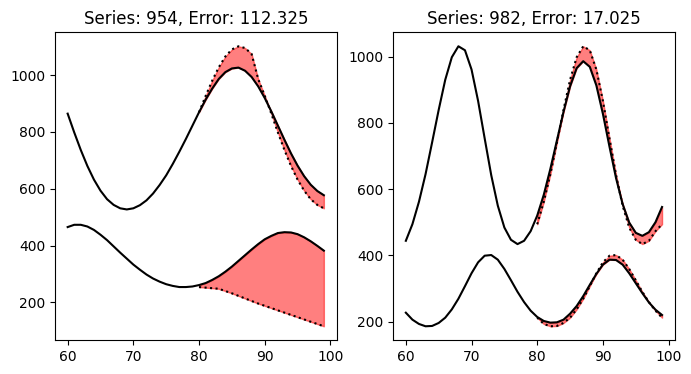

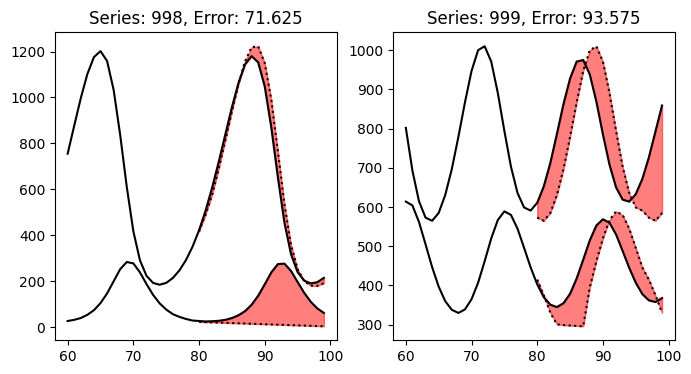

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from m2_cw.inference import visualise_forecasts


file_paths = [ file for file in Path.cwd().iterdir() if "forecast" in str(file) ]
file_path = [ file for file in file_paths if "2025-03-24" in str(file) ][0]

errors = visualise_forecasts(file_path=file_path, plots_per_row=2, prefix=20)

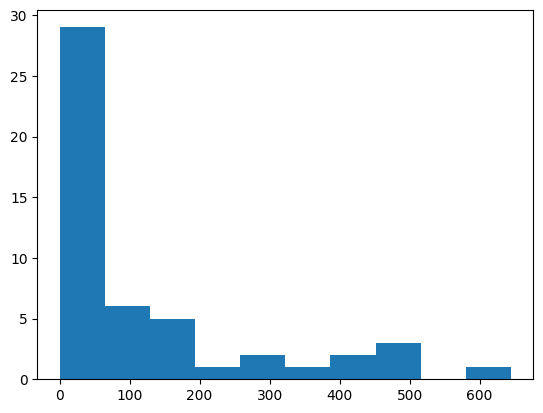

In [2]:
series_ids = []
maes = []
for k, v in errors.items():
    series_ids.append(k)
    maes.append(v)

df = pd.DataFrame(data={
    "series_id": series_ids,
    "MAE": maes,
})

plt.hist(maes, bins=10)
plt.show();

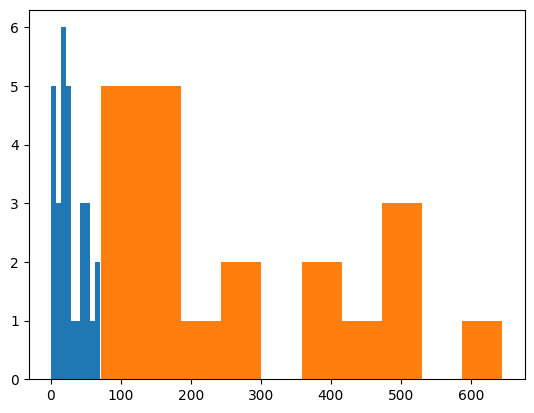

In [8]:
bestdf = df.nsmallest(30, "MAE")
worstdf = df.nlargest(20, "MAE")

plt.hist(bestdf["MAE"])
plt.hist(worstdf["MAE"])
plt.show();

In [27]:
import random
import pickle

random.seed(10022002)

bad_ids = worstdf["series_id"].to_list()
good_ids = bestdf["series_id"].to_list()
good_ids = random.sample(good_ids, 5)

chosen_ids = bad_ids + good_ids

with open("chosen_val_ids.pkl", "wb") as f:
    pickle.dump(chosen_ids, f)